In [1]:
import numpy as np

from scipy.stats import norm, multivariate_normal

import matplotlib
from matplotlib import rc

rc('text', usetex=True)
rc('text.latex', preamble='\\usepackage{color}')

import matplotlib.pyplot as plt

plt.style.use("bmh")
plt.rcParams["image.cmap"] = "Blues"

In [2]:
def kernel(house1, house2):
    """
    not vectorized
    """
    house1 = house1.flatten()
    house2 = house2.flatten()
    
    # different # stories
    if house1[1] != house2[1]:
        return 0
    
    return 1 - np.abs(house1[0] - house2[0]) / 1000


def parallel_coor_plot(mu, Sigma, ax=None):
    xs = np.arange(mu.shape[0])

    sd = np.sqrt(np.diagonal(Sigma))
    lower = mu - 1.96 * sd
    upper = mu + 1.96 * sd
    
    if ax is None:
        plt.figure(figsize=(8, 6))

        plt.errorbar(
            xs,
            mu,
            yerr=1.96 * sd,
            fmt="D-",
            markersize=15,
            capsize=10,
            elinewidth=4,
            capthick=4
        )

        plt.show()
    else:
        ax.errorbar(
            xs,
            mu,
            yerr=1.96 * sd,
            fmt="D-",
            markersize=15,
            capsize=10,
            elinewidth=4,
            capthick=4
        )
    
    
def posterior_mvn(mu, Sigma, train_ind, train_y):
    K_tt_inv = np.linalg.inv(np.atleast_2d(K[train_ind, :][:, train_ind]))
    
    post_mu = (
        mu 
        + Sigma[:, train_ind]
        @ K_tt_inv
        @ (train_y - mu[train_ind])
    )
    
    post_Sigma = (
        Sigma
        - Sigma[:, train_ind]
        @ K_tt_inv
        @ Sigma[train_ind, :]
        + np.eye(mu.size) * 1e-4
    )
    
    return post_mu, post_Sigma

In [3]:
# features: living area, # stories
houses = np.array(
    [
        [1000, 2],
        [1100, 2],
        [9000, 10]
    ]
)
n = houses.shape[0]

mean = np.zeros(n)
K = np.empty((n, n))

for i in range(n):
    for j in range(n):
        K[i, j] = kernel(houses[i, :], houses[j, :])
        
K  # doesn't contain the features anymore!

array([[1. , 0.9, 0. ],
       [0.9, 1. , 0. ],
       [0. , 0. , 1. ]])

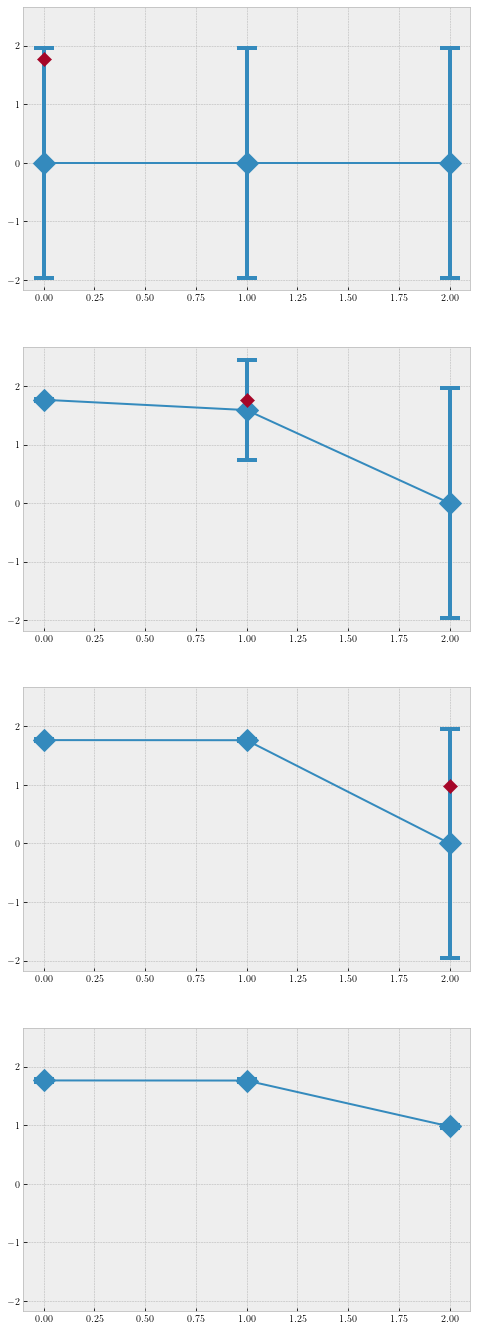

In [4]:
fig, ax = plt.subplots(n + 1, 1, figsize=(8, 6 * n + 6), sharey=True)

np.random.seed(0)

observed_ind = []
observed_y = []

post_mean = mean
post_K = K

for i in range(n):
    parallel_coor_plot(post_mean, post_K, ax=ax[i])
    
    normal = norm(post_mean[i], np.sqrt(post_K[i, i]))
    sample = normal.rvs()
    
    ax[i].scatter(i, sample, c="C1", marker="D", s=100, zorder=3)
    
    observed_ind.append(i)
    observed_y.append(sample)
    
    post_mean, post_K = posterior_mvn(mean, K, np.array(observed_ind), np.array(observed_y))

parallel_coor_plot(post_mean, post_K, ax=ax[-1])

In [5]:
# features: living area, # stories
houses = np.array([[1000 + i * 50, 2] for i in range(1, 21)])
n = houses.shape[0]

houses

array([[1050,    2],
       [1100,    2],
       [1150,    2],
       [1200,    2],
       [1250,    2],
       [1300,    2],
       [1350,    2],
       [1400,    2],
       [1450,    2],
       [1500,    2],
       [1550,    2],
       [1600,    2],
       [1650,    2],
       [1700,    2],
       [1750,    2],
       [1800,    2],
       [1850,    2],
       [1900,    2],
       [1950,    2],
       [2000,    2]])

In [6]:
mean = np.zeros(houses.shape[0])
K = np.empty((houses.shape[0], houses.shape[0]))

for i in range(houses.shape[0]):
    for j in range(houses.shape[0]):
        K[i, j] = kernel(houses[i, :], houses[j, :])
        
K  # doesn't contain the features anymore!

array([[1.  , 0.95, 0.9 , 0.85, 0.8 , 0.75, 0.7 , 0.65, 0.6 , 0.55, 0.5 ,
        0.45, 0.4 , 0.35, 0.3 , 0.25, 0.2 , 0.15, 0.1 , 0.05],
       [0.95, 1.  , 0.95, 0.9 , 0.85, 0.8 , 0.75, 0.7 , 0.65, 0.6 , 0.55,
        0.5 , 0.45, 0.4 , 0.35, 0.3 , 0.25, 0.2 , 0.15, 0.1 ],
       [0.9 , 0.95, 1.  , 0.95, 0.9 , 0.85, 0.8 , 0.75, 0.7 , 0.65, 0.6 ,
        0.55, 0.5 , 0.45, 0.4 , 0.35, 0.3 , 0.25, 0.2 , 0.15],
       [0.85, 0.9 , 0.95, 1.  , 0.95, 0.9 , 0.85, 0.8 , 0.75, 0.7 , 0.65,
        0.6 , 0.55, 0.5 , 0.45, 0.4 , 0.35, 0.3 , 0.25, 0.2 ],
       [0.8 , 0.85, 0.9 , 0.95, 1.  , 0.95, 0.9 , 0.85, 0.8 , 0.75, 0.7 ,
        0.65, 0.6 , 0.55, 0.5 , 0.45, 0.4 , 0.35, 0.3 , 0.25],
       [0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 0.95, 0.9 , 0.85, 0.8 , 0.75,
        0.7 , 0.65, 0.6 , 0.55, 0.5 , 0.45, 0.4 , 0.35, 0.3 ],
       [0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 0.95, 0.9 , 0.85, 0.8 ,
        0.75, 0.7 , 0.65, 0.6 , 0.55, 0.5 , 0.45, 0.4 , 0.35],
       [0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9

# no correlation!!

In [8]:
K[:] = 0
K[np.diag_indices(n)] = 1
K

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.

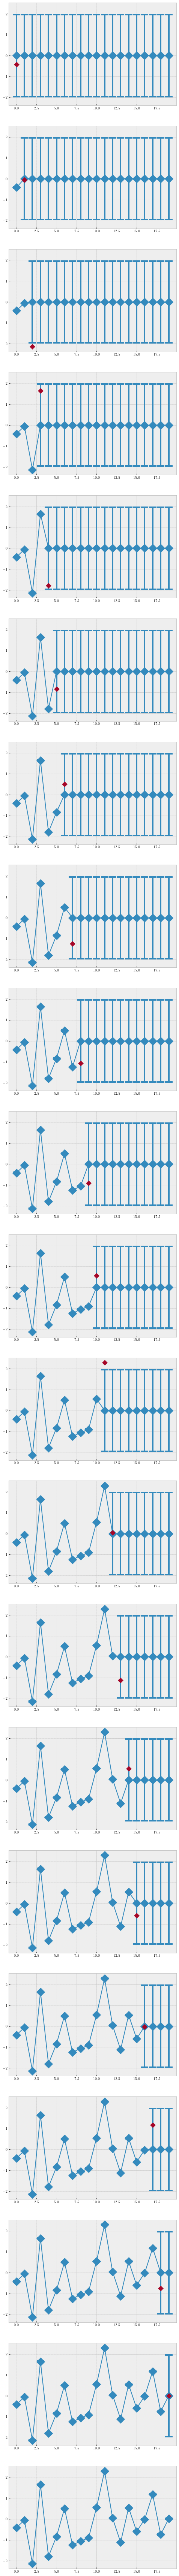

In [9]:
fig, ax = plt.subplots(n + 1, 1, figsize=(8, 6 * n + 6), sharey=True)

np.random.seed(2)

observed_ind = []
observed_y = []

post_mean = mean
post_K = K

for i in range(n):
    parallel_coor_plot(post_mean, post_K, ax=ax[i])
    
    normal = norm(post_mean[i], np.sqrt(post_K[i, i]))
    sample = normal.rvs()
    
    ax[i].scatter(i, sample, c="C1", marker="D", s=100, zorder=3)
    
    observed_ind.append(i)
    observed_y.append(sample)
    
    post_mean, post_K = posterior_mvn(mean, K, np.array(observed_ind), np.array(observed_y))

parallel_coor_plot(post_mean, post_K, ax=ax[-1])